In [1]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
features_cnv_df = pd.read_csv("../../data/cnv_df_128_tw.csv")
features_gene_df = pd.read_csv("../../data/gene_df_128_tw.csv")
label_df = pd.read_csv("../../data/final_labels.csv")

In [3]:
features_cnv_df = features_cnv_df.merge(label_df[['Case_ID_Final','File ID']], left_on='file_name',right_on = 'File ID', how = 'left')
features_cnv_df.drop(columns=['File ID','file_name'],inplace = True)

In [4]:
features_gene_df = features_gene_df.merge(label_df[['Case_ID_Final','File ID']], left_on='file_name',right_on = 'File ID', how = 'left')
features_gene_df.drop(columns=['File ID','file_name'],inplace = True)

In [5]:
features_cnv_df.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Case_ID_Final
0,0.617700,0.011123,1.709592,1.802925,0.864535,0.013604,1.251312,0.654158,0.529081,1.054439,...,-0.070066,-0.001569,-1.816005,1.563665,-2.394009,1.257136,0.394306,-1.513282,2.038277,TCGA-33-4582
1,0.701019,1.634090,1.713905,1.874578,0.944521,-1.083194,0.259510,0.460175,0.286948,1.238761,...,-0.890278,-0.679742,-1.816005,-0.602386,-2.748668,1.140180,0.989450,-1.030964,2.194542,TCGA-LA-A7SW
2,0.482779,0.834642,1.762489,1.899293,0.802337,-0.077112,-0.252213,0.776146,0.537715,0.900972,...,0.545567,1.027019,-1.816005,0.069231,-2.467926,1.354587,1.037515,-1.744227,1.812896,TCGA-43-5670
3,0.017044,-0.117965,1.499648,1.796704,0.022777,-0.707842,0.717963,-0.450479,-0.127403,0.987478,...,-0.826764,-0.335318,-0.642262,-0.153610,-2.529420,1.140180,0.609665,-1.030876,2.052207,TCGA-21-5782
4,-0.230598,0.136987,1.499648,1.796704,0.142297,-0.392801,0.524221,0.057456,-0.127403,0.507077,...,-1.121887,0.059129,-1.010980,-0.244771,-2.726314,1.140180,-0.026577,-0.617281,2.280982,TCGA-22-4601


In [6]:
features_gene_df.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Case_ID_Final
0,-0.723040,-0.727643,0.481543,0.097189,-0.044624,-0.156007,-0.154831,0.664276,-0.689005,-0.785849,...,1.492557,-0.319100,-0.367510,0.127676,-0.419394,0.314201,0.629479,-0.005811,0.024343,TCGA-NC-A5HJ
1,-0.723040,-0.160989,0.200158,-1.077208,-0.199147,0.287531,-0.081362,0.142628,-0.230718,0.107292,...,0.090072,-0.068541,-1.042671,0.230443,-0.795689,0.197465,-0.606612,-0.005811,0.478020,TCGA-38-4629
2,0.718881,-0.624347,-0.336003,-2.066164,0.825467,0.951794,-0.547016,0.142628,0.017885,-0.804216,...,-0.583218,-1.108014,0.338714,0.632016,-0.585889,-0.267355,-0.606612,0.605120,0.032335,TCGA-22-1012
3,1.438180,-0.557001,-0.336003,-2.066164,2.620411,2.022248,-0.547016,0.142628,0.599585,-0.285971,...,-0.583218,-1.087689,0.193324,0.576623,0.221532,-0.435843,1.303435,1.688595,-0.274273,TCGA-18-5592
4,-0.521697,-0.107451,-0.336003,-1.552636,-0.199147,-0.156007,-0.442018,0.142628,0.148820,-0.442668,...,-0.095162,-0.765949,-0.027248,0.209361,-0.867946,-0.212317,-0.440243,-0.005811,-0.348813,TCGA-39-5035


In [7]:
features_df = pd.merge(left = features_cnv_df,right=features_gene_df, on='Case_ID_Final')
cases = features_df.pop('Case_ID_Final')
features_df.insert(0,'case_id',cases)

In [8]:
features_df

,case_id,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,...,118_y,119_y,120_y,121_y,122_y,123_y,124_y,125_y,126_y,127_y
0,TCGA-33-4582,0.617700,0.011123,1.709592,1.802925,0.864535,0.013604,1.251312,0.654158,0.529081,...,1.188465,-0.583218,-1.108014,-0.781048,0.341220,-0.889050,0.501424,-0.606612,0.733413,0.728587
1,TCGA-LA-A7SW,0.701019,1.634090,1.713905,1.874578,0.944521,-1.083194,0.259510,0.460175,0.286948,...,1.579572,-0.583218,-1.108014,2.085074,3.976887,-0.889050,0.693005,-0.606612,2.230439,0.877067
2,TCGA-43-5670,0.482779,0.834642,1.762489,1.899293,0.802337,-0.077112,-0.252213,0.776146,0.537715,...,-0.510289,-0.583218,-1.059445,-0.436366,1.755806,0.362965,0.373725,-0.606612,0.778685,-0.275931
3,TCGA-21-5782,0.017044,-0.117965,1.499648,1.796704,0.022777,-0.707842,0.717963,-0.450479,-0.127403,...,-0.591628,-0.583218,-1.108014,2.580096,3.470925,-0.889050,3.281640,-0.606612,-0.005811,-0.348813
4,TCGA-22-4601,-0.230598,0.136987,1.499648,1.796704,0.142297,-0.392801,0.524221,0.057456,-0.127403,...,-0.591628,-0.407987,-0.831639,0.108067,1.313065,0.930243,-0.435843,1.124964,1.457695,-0.157571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,TCGA-58-8388,0.104792,0.337378,1.499648,1.796704,-0.351197,-0.798211,-0.298172,-0.230740,-0.127403,...,1.571771,3.048126,-0.635820,2.242014,3.253974,3.821714,0.428714,1.041182,1.507191,-0.348813
950,TCGA-77-A5GB,0.054778,-0.184974,1.499648,1.796704,-0.171608,-0.950108,0.357520,-0.224926,-0.127403,...,-0.314874,0.229733,-0.436368,0.346025,0.127676,-0.834025,-0.435843,-0.290172,0.250337,-0.348813
951,TCGA-55-6543,-0.080958,-0.737993,1.620272,1.800267,-0.261851,-0.587495,0.535072,-0.229857,0.078975,...,0.005863,0.328992,0.804076,-1.170032,0.336073,0.100754,0.591383,-0.302301,-0.005811,0.112820
952,TCGA-77-A5G3,1.256258,1.991867,2.139649,2.798089,1.641920,1.495566,2.351040,2.038052,1.044466,...,-0.162325,-0.583218,-1.108014,1.456743,2.328122,0.722910,-0.435843,0.141187,1.821141,0.249000


In [9]:
label_df_2 = label_df.groupby(['Case_ID_Final','LABEL','final_label','Project ID']).agg({'File ID':'nunique'}).reset_index()
label_df_2.index = label_df_2['Case_ID_Final']
label_df_2

,Case_ID_Final,LABEL,final_label,Project ID,File ID
Case_ID_Final,,,,,
TCGA-05-4244,TCGA-05-4244,ALC,"Adenocarcinoma, NOS",TCGA-LUAD,2
TCGA-05-4249,TCGA-05-4249,ALC,"Adenocarcinoma, NOS",TCGA-LUAD,2
TCGA-05-4250,TCGA-05-4250,ALC,"Adenocarcinoma, NOS",TCGA-LUAD,2
TCGA-05-4382,TCGA-05-4382,ALC,Adenocarcinoma with mixed subtypes,TCGA-LUAD,2
TCGA-05-4384,TCGA-05-4384,ALC,Adenocarcinoma with mixed subtypes,TCGA-LUAD,2
...,...,...,...,...,...
TCGA-O2-A52V,TCGA-O2-A52V,SCLC,"Squamous cell carcinoma, NOS",TCGA-LUSC,2
TCGA-O2-A52W,TCGA-O2-A52W,SCLC,"Squamous cell carcinoma, NOS",TCGA-LUSC,2
TCGA-O2-A5IB,TCGA-O2-A5IB,SCLC,"Squamous cell carcinoma, NOS",TCGA-LUSC,2


In [10]:
labels = label_df_2.loc[features_df['case_id']]['LABEL']
labels_more = label_df_2.loc[features_df['case_id']]['final_label']
projects = label_df_2.loc[features_df['case_id']]['Project ID']

### Using t-SNE 

/Users/arnavgupta/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/arnavgupta/opt/anaconda3/envs/pytorch/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 954 samples in 0.000s...
[t-SNE] Computed neighbors for 954 samples in 0.038s...
[t-SNE] Computed conditional probabilities for sample 954 / 954
[t-SNE] Mean sigma: 3.332670
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.718498
[t-SNE] KL divergence after 1000 iterations: 0.980623


[Text(0.5, 1.0, 'Iris data T-SNE projection')]

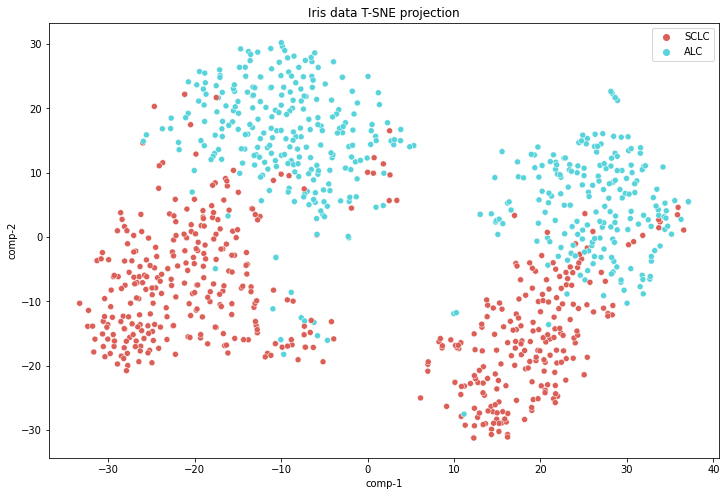

In [11]:
X = features_df.iloc[:,1:]
Y = labels
tsne = TSNE(n_components=2, verbose=1, random_state=13)
z = tsne.fit_transform(X)
df = pd.DataFrame()
df["y"] = Y
df["y_more"] = labels_more
df["projects"] = projects
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

fig = plt.gcf()
fig.set_size_inches(12, 8)

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="Iris data T-SNE projection") 

## Using PCA

[Text(0.5, 1.0, 'Iris data PCA projection')]

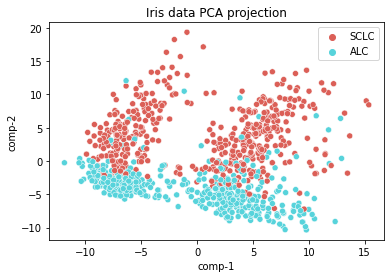

In [12]:
X = features_df.iloc[:,1:]
Y = labels
pca = PCA(n_components=2)
z = pca.fit_transform(X)
df = pd.DataFrame()
df["y"] = Y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="Iris data PCA projection") 

## 10 fold cross validation

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from mlmodels import cross_validate_custom

In [14]:
VC = VotingClassifier(estimators=[('SVM', SVC(kernel = 'rbf', probability=True)),
 ('RF', RandomForestClassifier(n_estimators=100))],voting='soft')
estimators = [SVC(kernel='rbf',probability=True), RandomForestClassifier(n_estimators=100),VC]

In [15]:
result = []
for estimator in estimators:
    result.append(cross_validate_custom(X,Y,estimator))
result = pd.DataFrame(result,index = ['SVM','RF','Voting'])
result


,accuracy_mean,accuracy_std,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std,roc_auc_mean,roc_auc_std
SVM,0.944386,0.030553,0.945198,0.029975,0.945028,0.030384,0.944364,0.030566,0.983857,0.009209
RF,0.933904,0.030209,0.934909,0.029522,0.934158,0.030329,0.933814,0.030281,0.982770,0.009871
Voting,0.940208,0.031610,0.940643,0.031417,0.940593,0.031549,0.940177,0.031618,0.984121,0.007864
